In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("jobs_in_data.csv")

In [5]:
df.head(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
7,2023,Machine Learning Researcher,Machine Learning and AI,USD,224400,224400,United States,Mid-level,Full-time,In-person,United States,M
8,2023,Machine Learning Researcher,Machine Learning and AI,USD,138700,138700,United States,Mid-level,Full-time,In-person,United States,M
9,2023,Data Engineer,Data Engineering,USD,210000,210000,United States,Executive,Full-time,Remote,United States,M


In [6]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [7]:
job_df = df.groupby("job_category")["salary_in_usd"].mean().reset_index()

In [8]:
job_df

,job_category,salary_in_usd
0,BI and Visualization,135092.102236
1,Cloud and Database,155000.000000
2,Data Analysis,108505.721345
3,Data Architecture and Modeling,156002.359073
4,Data Engineering,146197.656195
5,Data Management and Strategy,103139.934426
6,Data Quality and Operations,100879.472727
7,Data Science and Research,163758.575979
8,Leadership and Management,145476.019881
9,Machine Learning and AI,178925.847339


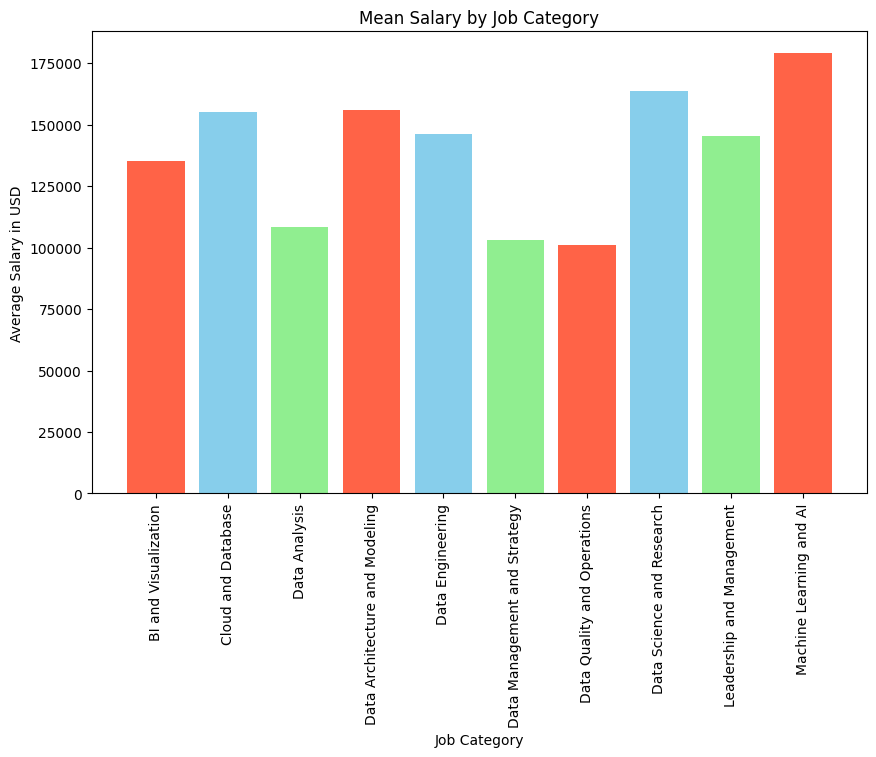

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(job_df["job_category"], job_df["salary_in_usd"], color = ["tomato", "skyblue", "lightgreen"])
plt.xticks(rotation="vertical")
plt.xlabel("Job Category")
plt.ylabel("Average Salary in USD")
plt.title("Mean Salary by Job Category")
plt.show()

In [10]:
df.isnull().count()

work_year             9355
job_title             9355
job_category          9355
salary_currency       9355
salary                9355
salary_in_usd         9355
employee_residence    9355
experience_level      9355
employment_type       9355
work_setting          9355
company_location      9355
company_size          9355
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype != "int64":
        df[column] = label_encoder.fit_transform(df[column])

In [13]:
df['salary_bin'] = pd.cut(df['salary_in_usd'], bins=5, labels=False)

In [14]:
df["salary_bin"].dtype

dtype('int64')

In [15]:
X = df.drop(columns=["salary", "salary_in_usd", "salary_bin"], axis=1)
y = df["salary_bin"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [17]:
lm1 = LinearRegression()

In [18]:
lm1 = lm1.fit(X_train, y_train)

In [19]:
train_predictions = lm1.predict(X_train)
test_predictions = lm1.predict(X_test)

In [20]:
train_predictions

array([1.33782348, 0.90269073, 1.37568261, ..., 1.09111946, 1.36263368,
       1.16781664])

In [21]:
test_predictions

array([0.71625181, 1.00580651, 1.09111946, ..., 0.89632782, 0.73021623,
       1.36263368])

In [22]:
train_r2 = r2_score(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)

print("Train R2: ", train_r2)
print("Train MAE: ", train_mae)
print("Train MSE: ", train_mse)
print("Train RMSE: ", train_rmse, end="\n\n")

test_r2 = r2_score(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

print("Test R2: ", test_r2)
print("Test MAE: ", test_mae)
print("Test MSE: ", test_mse)
print("Test RMSE: ", test_rmse)

Train R2:  0.23867101048722916
Train MAE:  0.5243407314438167
Train MSE:  0.4642498529431953
Train RMSE:  0.6813588283299743

Test R2:  0.1880943805298052
Test MAE:  0.5315025503868249
Test MSE:  0.4796490923430779
Test RMSE:  0.6925670309385784


In [23]:
coef_df = pd.DataFrame({"Features": X.columns, "Coefficients": lm1.coef_})

In [24]:
coef_df['Absolute_Coefficients'] = np.abs(coef_df['Coefficients'])
coef_df = coef_df.sort_values(by='Absolute_Coefficients', ascending=False)
print("Top Coefficients:")
print(coef_df.head(10))

Top Coefficients:
             Features  Coefficients  Absolute_Coefficients
5    experience_level      0.192399               0.192399
9        company_size     -0.163101               0.163101
3     salary_currency      0.147401               0.147401
6     employment_type      0.122811               0.122811
0           work_year      0.085313               0.085313
2        job_category      0.076912               0.076912
7        work_setting     -0.024810               0.024810
4  employee_residence      0.006011               0.006011
8    company_location     -0.004534               0.004534
1           job_title      0.001631               0.001631


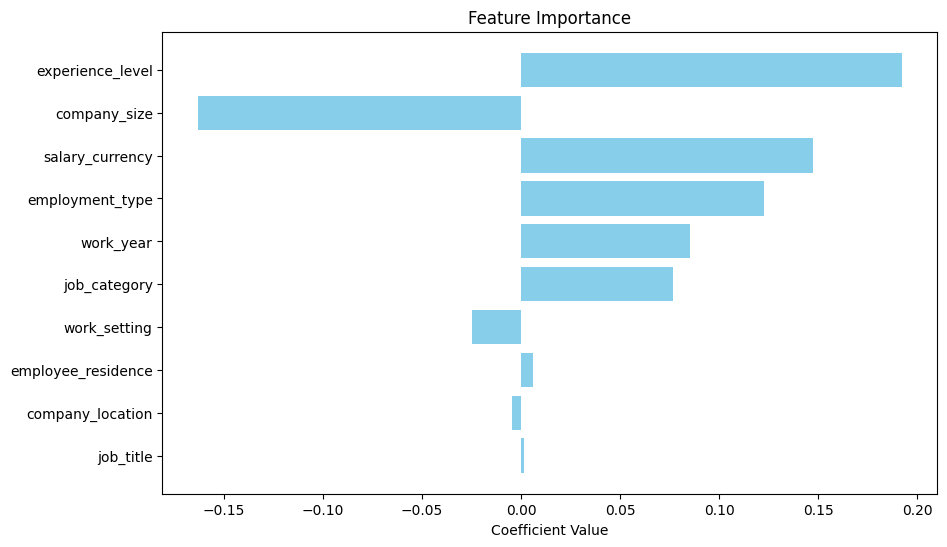

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Features'], coef_df['Coefficients'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()